In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time
from RediCell_cupy import *
from DesignTool import *
import pickle

In [3]:
b = pickle.load(open('full_ecoli.pkl', 'rb'))

In [4]:
b

In [21]:
b.simulate(3000000, t_step=5e-5, plot_every=None, timing=False, 
           checkpoint_every=50000, checkpoint_filename='full_ecoli.pkl', 
           traj_every=50000, traj_filename='full_ecoli.npy', log_every=100)
# a.plot(['Iex', 'Iin'], wall=False)

  0%|          | 0/3000000 [00:00<?, ?it/s]

Simulate 3000000 steps


  1%|          | 32663/3000000 [02:43<4:08:02, 199.39it/s]


KeyboardInterrupt: 

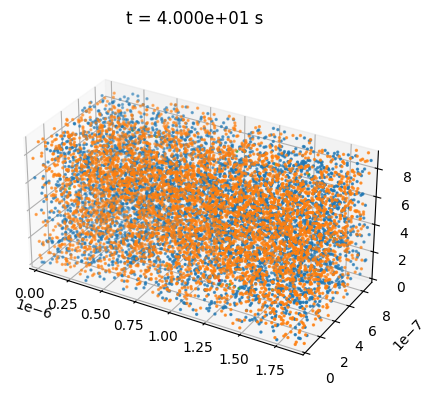

In [7]:
b.plot(['Iex','I', 'Y', 'YI'], wall=False)

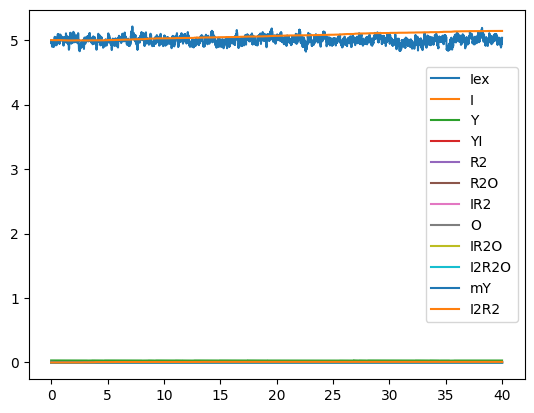

In [8]:
plt.plot(b.t_trace, np.array([x.astype(cp.float32).get() for x in b.conc_trace]) * b.one_per_voxel_equal_um / np.prod(np.array(b.voxel_matrix[0].shape)), label=b.mol_to_id)
plt.legend()
# plt.yticks(range(7))
# plt.yscale('log')

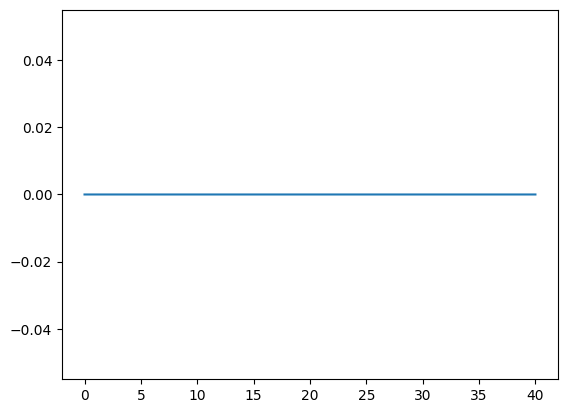

In [20]:
plt.plot(b.t_trace, cp.array(b.conc_trace)[:, b.mol_to_id['mY']].get())